**Online news article data- I- Five classes**

In [2]:
import pandas as AAD

ON_NeWs_ATL_I = AAD.read_csv('ON_NeWs_ATL_I.csv')
ON_NeWs_ATL_I

,Text,Category
0,worldcom ex boss launch defenc lawyer defend f...,business
1,german busi confid slide german busi confid fe...,business
2,bbc poll indic econom gloom citizen major nati...,business
3,lifestyl govern mobil choic faster better funk...,tech
4,enron boss payout eighteen former enron direct...,business
...,...,...
1435,doubl evict big brother model capric holbi cit...,entertainment
1436,dj doubl act revamp chart show dj duo jk joel ...,entertainment
1437,weak dollar hit reuter revenu media group reut...,business
1438,appl ipod famili expand market appl expand ipo...,tech


In [3]:
import warnings as DDD
DDD.filterwarnings("ignore")

In [4]:
ON_NeWs_ATL_I.Category.value_counts()

sport            342
business         335
politics         266
entertainment    263
tech             234
Name: Category, dtype: int64

* Five classes in output category

In [8]:
o_ON_NeWs_ATL= ON_NeWs_ATL_I['Category']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer as CCV

CCV_L = CCV(analyzer='char')
i_ON_NeWs_ATL = CCV_L.fit_transform(ON_NeWs_ATL_I['Text'].values.astype('U')).toarray()
i_ON_NeWs_ATL

array([[186,  75,  27, ...,   4,  10,   1],
       [195,  72,  15, ...,   6,   7,   2],
       [268,  99,  26, ...,   2,  12,   2],
       ...,
       [127,  60,  11, ...,   3,   9,   0],
       [318, 145,  26, ...,   3,  19,   3],
       [166,  59,  20, ...,   2,   1,   0]])

In [9]:
from sklearn.model_selection import train_test_split as LLR

ir_ON_NeWs_ATL, is_ON_NeWs_ATL, or_ON_NeWs_ATL, os_ON_NeWs_ATL = LLR(i_ON_NeWs_ATL, o_ON_NeWs_ATL, test_size= 0.4, random_state= 223)
iv_ON_NeWs_ATL, is_ON_NeWs_ATL, ov_ON_NeWs_ATL, os_ON_NeWs_ATL = LLR(is_ON_NeWs_ATL, os_ON_NeWs_ATL, test_size= 0.5, random_state= 223)

In [10]:
ir_ON_NeWs_ATL.shape #      train

(864, 27)

In [11]:
iv_ON_NeWs_ATL.shape #          Validation

(288, 27)

In [12]:
is_ON_NeWs_ATL.shape #      test

(288, 27)

## **Machine Learning Algorithms**

In [13]:
from sklearn.metrics import classification_report as Mteric1
from sklearn.metrics import confusion_matrix as Mteric2
from sklearn.metrics import ConfusionMatrixDisplay as Mteric3
import time as Mteric4
from sklearn.model_selection import GridSearchCV as GGR

**Logistic Regression**


In [14]:
from sklearn.linear_model import LogisticRegression as Mteric5

ONA_K = {'penalty': ['l1', 'l2', 'elasticnet', None],
            'multi_class': ['auto', 'ovr', 'multinomial']}

ONA_KM = Mteric5(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:500],or_ON_NeWs_ATL[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'multi_class': 'ovr', 'penalty': 'l2'}
0.522


In [15]:
Mteric_s = Mteric4.time()

Mo_News = Mteric5(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.14959073066711426


LogisticRegression(multi_class='ovr')

               precision    recall  f1-score   support

     business       0.47      0.59      0.52        58
entertainment       0.58      0.38      0.46        66
     politics       0.44      0.43      0.43        54
        sport       0.64      0.79      0.71        63
         tech       0.64      0.57      0.61        47

     accuracy                           0.55       288
    macro avg       0.55      0.55      0.55       288
 weighted avg       0.56      0.55      0.55       288

time-dur-validating = 0.08986043930053711


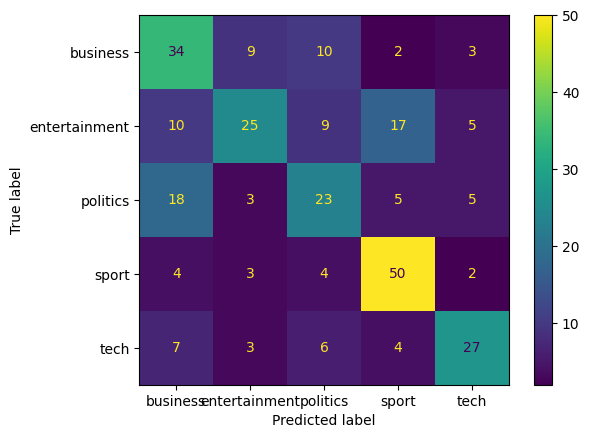

In [19]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

               precision    recall  f1-score   support

     business       0.59      0.64      0.61        64
entertainment       0.47      0.29      0.36        48
     politics       0.45      0.51      0.48        51
        sport       0.69      0.76      0.72        74
         tech       0.57      0.55      0.56        51

     accuracy                           0.57       288
    macro avg       0.55      0.55      0.55       288
 weighted avg       0.57      0.57      0.57       288

time-dur-testing = 0.22622895240783691


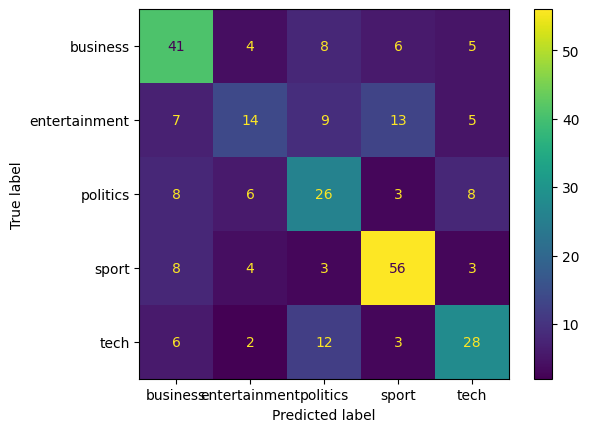

In [18]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

**SVM**


In [20]:
from sklearn.svm import SVC as Mteric6

ONA_K = {'max_iter': [1, -1, 2, 3],
            'decision_function_shape': ['ovo', 'ovr'],
         'kernel': ['sigmpid', 'poly', 'rbf']}

ONA_KM = Mteric6(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:500],or_ON_NeWs_ATL[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'decision_function_shape': 'ovo', 'kernel': 'poly', 'max_iter': -1}
0.368


In [21]:
Mteric_s = Mteric4.time()

Mo_News = Mteric6(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.06809520721435547


SVC(decision_function_shape='ovo', kernel='poly')

               precision    recall  f1-score   support

     business       0.36      0.67      0.47        58
entertainment       1.00      0.03      0.06        66
     politics       0.55      0.20      0.30        54
        sport       0.43      0.92      0.58        63
         tech       0.68      0.32      0.43        47

     accuracy                           0.43       288
    macro avg       0.60      0.43      0.37       288
 weighted avg       0.61      0.43      0.36       288

time-dur-validating = 0.08322358131408691


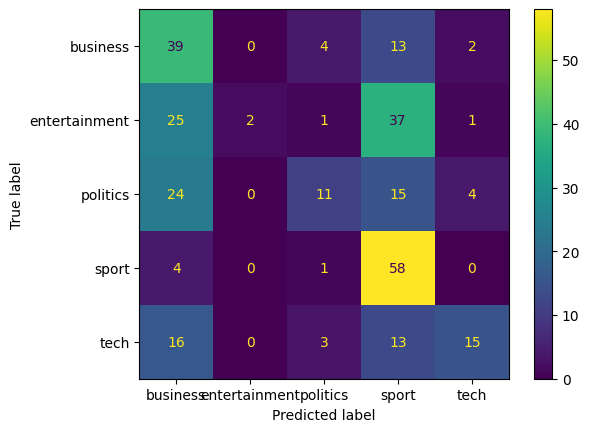

In [22]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

               precision    recall  f1-score   support

     business       0.45      0.70      0.55        64
entertainment       0.25      0.02      0.04        48
     politics       0.43      0.29      0.35        51
        sport       0.52      0.85      0.64        74
         tech       0.54      0.27      0.36        51

     accuracy                           0.48       288
    macro avg       0.44      0.43      0.39       288
 weighted avg       0.44      0.48      0.42       288

time-dur-testing = 0.37671780586242676


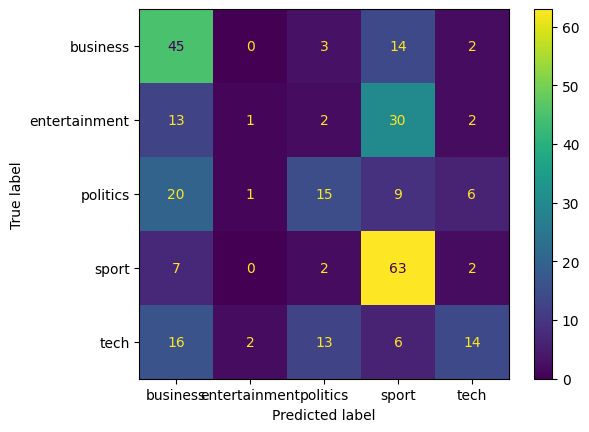

In [23]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

**Decision Tree**


In [24]:
from sklearn.tree import DecisionTreeClassifier as Mteric7

ONA_K = {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['auto', 'sqrt', 'log2']}

ONA_KM = Mteric7(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:500],or_ON_NeWs_ATL[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'gini', 'max_features': 'log2'}
0.316


In [25]:
Mteric_s = Mteric4.time()

Mo_News = Mteric7(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.005936622619628906


DecisionTreeClassifier(max_features='log2')

               precision    recall  f1-score   support

     business       0.33      0.33      0.33        58
entertainment       0.40      0.29      0.33        66
     politics       0.35      0.37      0.36        54
        sport       0.47      0.54      0.50        63
         tech       0.28      0.32      0.30        47

     accuracy                           0.37       288
    macro avg       0.37      0.37      0.36       288
 weighted avg       0.37      0.37      0.37       288

time-dur-validating = 0.10387134552001953


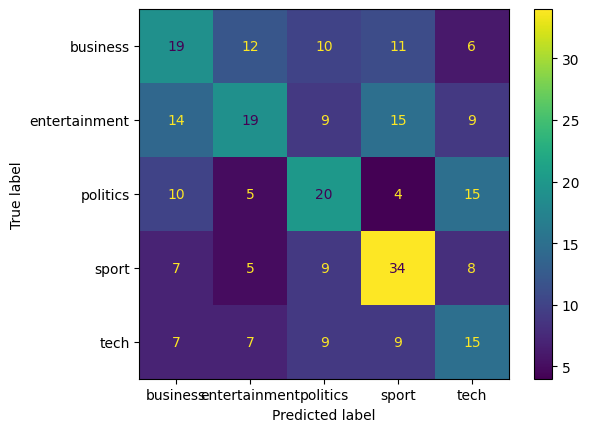

In [26]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

               precision    recall  f1-score   support

     business       0.48      0.50      0.49        64
entertainment       0.31      0.29      0.30        48
     politics       0.31      0.35      0.33        51
        sport       0.59      0.50      0.54        74
         tech       0.27      0.29      0.28        51

     accuracy                           0.40       288
    macro avg       0.39      0.39      0.39       288
 weighted avg       0.41      0.40      0.41       288

time-dur-testing = 0.1281569004058838


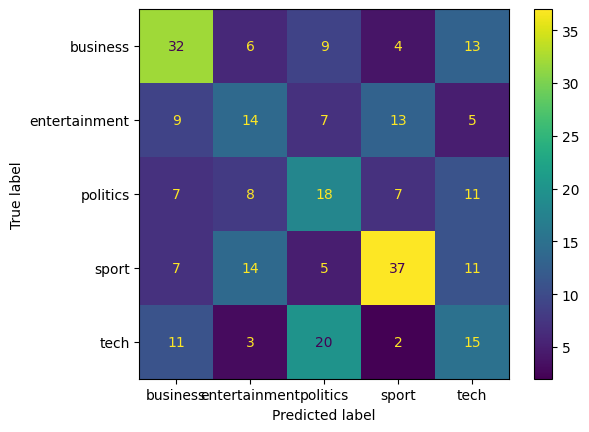

In [27]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

**Random Forest**


In [28]:
from sklearn.ensemble import RandomForestClassifier as Mteric8

ONA_K = {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['auto', 'sqrt', 'log2']}

ONA_KM = Mteric8(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:500],or_ON_NeWs_ATL[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'entropy', 'max_features': 'auto'}
0.438


In [29]:
Mteric_s = Mteric4.time()

Mo_News = Mteric8(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.4572317600250244


RandomForestClassifier(criterion='entropy', max_features='auto')

               precision    recall  f1-score   support

     business       0.39      0.48      0.43        58
entertainment       0.61      0.41      0.49        66
     politics       0.48      0.52      0.50        54
        sport       0.54      0.71      0.61        63
         tech       0.57      0.36      0.44        47

     accuracy                           0.50       288
    macro avg       0.52      0.50      0.50       288
 weighted avg       0.52      0.50      0.50       288

time-dur-validating = 0.27162957191467285


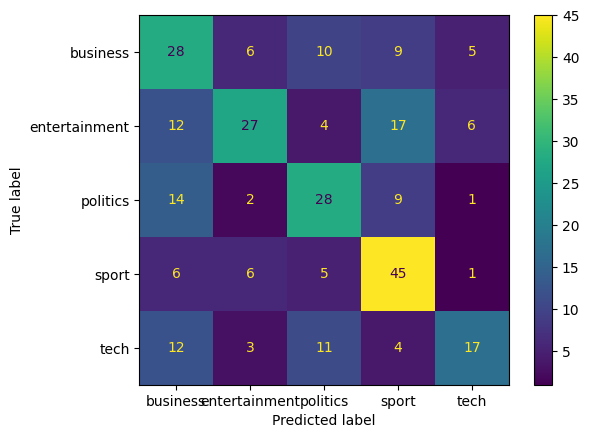

In [30]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

               precision    recall  f1-score   support

     business       0.50      0.61      0.55        64
entertainment       0.58      0.29      0.39        48
     politics       0.39      0.51      0.44        51
        sport       0.60      0.69      0.64        74
         tech       0.50      0.33      0.40        51

     accuracy                           0.51       288
    macro avg       0.51      0.49      0.48       288
 weighted avg       0.52      0.51      0.50       288

time-dur-testing = 0.08862924575805664


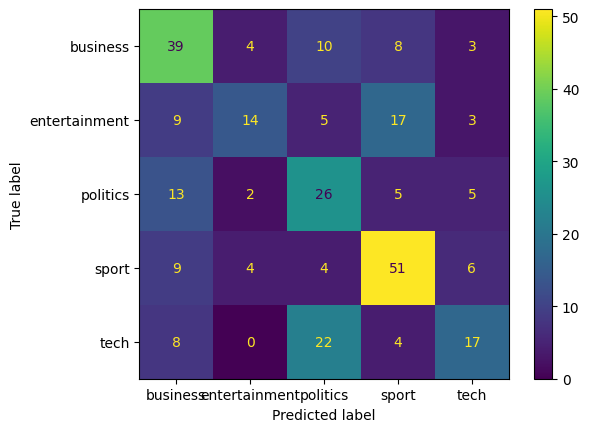

In [31]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

**Gradient Boosting**

In [32]:
from sklearn.ensemble import GradientBoostingClassifier as Mteric9

ONA_K = {'criterion': ['friedman_mse', 'squared_error'],
            'max_features': ['sqrt', 'log2']}

ONA_KM = Mteric9(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:500],or_ON_NeWs_ATL[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'friedman_mse', 'max_features': 'sqrt'}
0.43


In [33]:
Mteric_s = Mteric4.time()

Mo_News = Mteric9(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.896435022354126


GradientBoostingClassifier(max_features='sqrt')

               precision    recall  f1-score   support

     business       0.41      0.53      0.47        58
entertainment       0.56      0.44      0.49        66
     politics       0.53      0.54      0.53        54
        sport       0.61      0.71      0.66        63
         tech       0.53      0.36      0.43        47

     accuracy                           0.52       288
    macro avg       0.53      0.52      0.52       288
 weighted avg       0.53      0.52      0.52       288

time-dur-validating = 0.11838698387145996


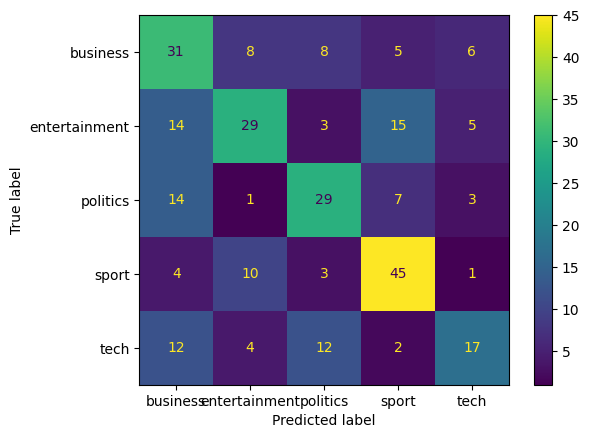

In [34]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

               precision    recall  f1-score   support

     business       0.53      0.56      0.55        64
entertainment       0.37      0.29      0.33        48
     politics       0.42      0.51      0.46        51
        sport       0.58      0.61      0.59        74
         tech       0.55      0.45      0.49        51

     accuracy                           0.50       288
    macro avg       0.49      0.48      0.48       288
 weighted avg       0.50      0.50      0.50       288

time-dur-testing = 0.09702301025390625


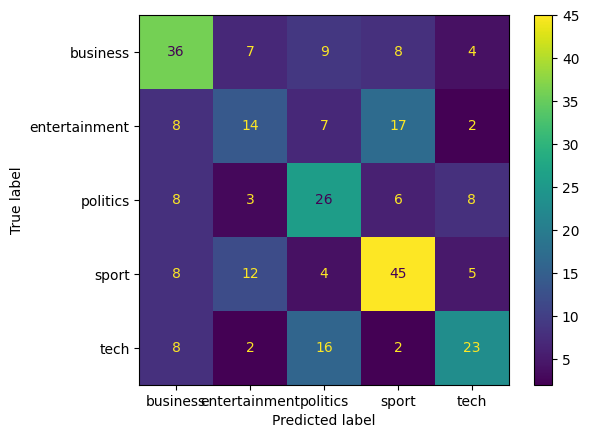

In [35]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

## **Neural Network Algorithms**

**Multi Layer Perceptron**

In [36]:
from sklearn.neural_network import MLPClassifier as Mteric10

ONA_K = {'learning_rate': ['constant', 'invscaling', 'adaptive'],
            'solver': ['adam','lbfgs', 'sgd']}

ONA_KM = Mteric10(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:500],or_ON_NeWs_ATL[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'learning_rate': 'constant', 'solver': 'lbfgs'}
0.476


In [37]:
Mteric_s = Mteric4.time()

Mo_News = Mteric10(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.9137692451477051


MLPClassifier(solver='lbfgs')

               precision    recall  f1-score   support

     business       0.41      0.50      0.45        58
entertainment       0.41      0.42      0.42        66
     politics       0.46      0.33      0.39        54
        sport       0.60      0.62      0.61        63
         tech       0.44      0.43      0.43        47

     accuracy                           0.47       288
    macro avg       0.47      0.46      0.46       288
 weighted avg       0.47      0.47      0.46       288

time-dur-validating = 0.10843491554260254


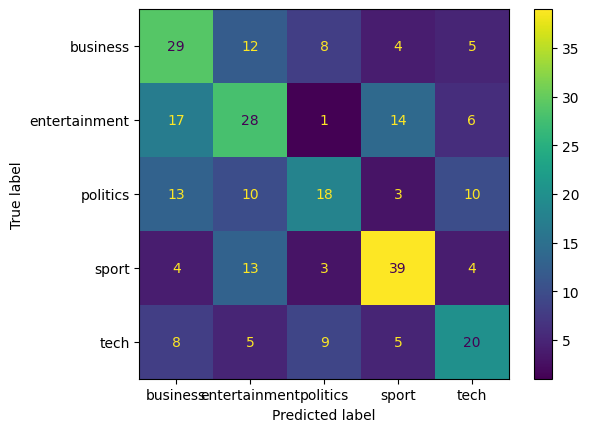

In [38]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

               precision    recall  f1-score   support

     business       0.42      0.45      0.44        64
entertainment       0.31      0.40      0.35        48
     politics       0.46      0.37      0.41        51
        sport       0.66      0.61      0.63        74
         tech       0.50      0.47      0.48        51

     accuracy                           0.47       288
    macro avg       0.47      0.46      0.46       288
 weighted avg       0.49      0.47      0.48       288

time-dur-testing = 0.14685654640197754


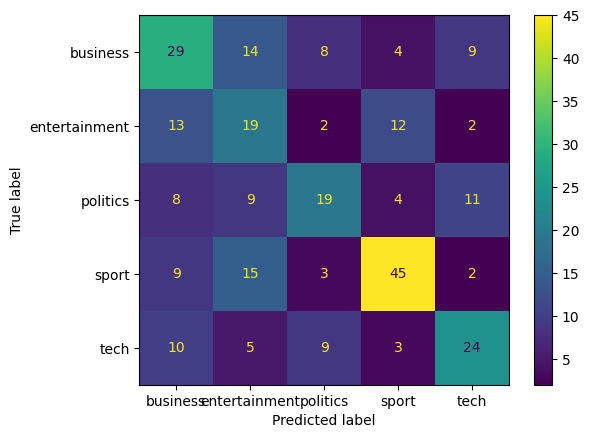

In [39]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)